# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [283]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

In [284]:
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# convert to celsius
data['Data_Value'] = data['Data_Value'].apply(lambda x:x/10)

#convert to datetime Date
data['Date'] = pd.to_datetime(data['Date'])

#create the series Month-Day

data['Month-Day'] = pd.to_datetime(data['Date']).dt.strftime('%m-%d')

#Delete all 29 February and restores the index

data_clean = data[~((data['Date'].dt.month == 2) & (data['Date'].dt.day == 29))]
data_clean = data_clean.reset_index(drop = True)

#Separate in 2 df. One for the range and the other for 2015

data_clean_range = data_clean[(~(data_clean['Date'].dt.year == 2015)) & (data_clean['Date'].dt.year >= 2005)]
data_clean_2015 = data_clean[(data_clean['Date'].dt.year == 2015)]

#obtain max and min for all the daily dates in the range 2005-2014
df_min = data_clean_range[data_clean_range['Element'] == 'TMIN'].groupby('Month-Day').agg({'Data_Value':'min'})
df_max = data_clean_range[data_clean_range['Element'] == 'TMAX'].groupby('Month-Day').agg({'Data_Value':'max'})

#get the same format of df_min and df_max to compare
data_clean_2015_min = data_clean_2015[data_clean_2015['Element'] == 'TMIN'].groupby('Month-Day')['Date','Data_Value'].min()
data_clean_2015_max = data_clean_2015[data_clean_2015['Element'] == 'TMAX'].groupby('Month-Day')['Date','Data_Value'].max()

#obtain dates and temp for the 2015
record_min_2015 = data_clean_2015_min[df_min['Data_Value'] >= data_clean_2015_min['Data_Value']]
record_max_2015 = data_clean_2015_max[df_max['Data_Value'] <= data_clean_2015_max['Data_Value']]


Plotting using matplotlib library to get the chart

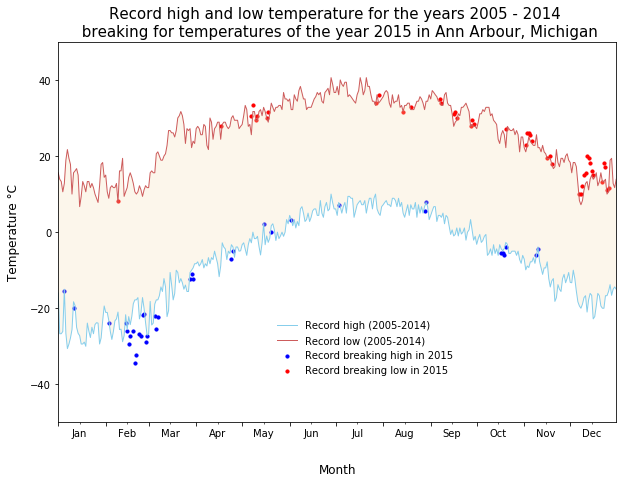

In [285]:
#declare the figure and change the width and height
plt.figure(figsize=(10,7))

#get the x (observation_dates) data for the plot in the form of datetime for 2015
observation_dates = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

#plot the scatter points of 2015 that exceeds the range of years 2005 to 2014
plt.scatter(record_min_2015.Date.values,record_min_2015['Data_Value'].values, s = 10, color = 'blue')
plt.scatter(record_max_2015.Date.values,record_max_2015['Data_Value'].values, s = 10, color = 'red')

#plot the daily max and min for range of years 2005 to 2014
plt.plot(observation_dates,df_min['Data_Value'],'-', color='skyblue', linewidth=1) 
plt.plot(observation_dates,df_max['Data_Value'],'-',color='indianred', linewidth=1)

#declare to change some the artist layer. GCA = get the current axes
ax = plt.gca()

#shadow the area between high and low
ax.fill_between(observation_dates, df_min['Data_Value'],df_max['Data_Value'], facecolor = 'wheat',alpha=0.25)

#xlim and ylim
#ax.axis(['2015/01/01','2015/12/31',-50,50])
ax.set_xlim(['2015/01/01','2015/12/31'])
ax.set_ylim([-50,50])

#set title, xlabel and ylabel
ax.set_title('Record high and low temperature for the years 2005 - 2014 \n breaking for temperatures of the year 2015 in Ann Arbour, Michigan',
            fontsize = 15)
ax.set_xlabel('Month', fontsize = 12, labelpad = 25) #labelpad: Spacing in points from the axes bounding box including ticks and tick labels.
ax.set_ylabel('Temperature °C', fontsize = 12, labelpad= 10)

#set legend without frame and using loc and bbox_to_anchor to get the right location on the plot
plt.legend(['Record high (2005-2014)','Record low (2005-2014)','Record breaking high in 2015','Record breaking low in 2015'],
           loc = 8,frameon=False,bbox_to_anchor=(0.3, 0.1, 0.5, 0.5))

#formatters' options 

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

plt.show()